# "Univariate Normal(Interactive plots - MatPlotLib and Streamlit )"
>  The previous [post](https://colab.research.google.com/drive/1wQ6QGoIaaPUNyHXq98H51bQceiV2C6eU?usp=sharing) introduced [univariate normal](https://en.wikipedia.org/wiki/Univariate_distribution#:~:text=In%20statistics%2C%20a%20univariate%20distribution,consisting%20of%20multiple%20random%20variables) distribution. This second part intends to explain how to  visualize the same using MatPlotLib animation and [Streamlit](https://streamlit.io/) librabry.


- toc: true 
- badges: true
- comments: true
- categories: ['jupyter','univariate','normal','animation','streamlit']
- author : Anand Khandekar
- image: images/unianim.jpg





# Streamlit and MatPlotLib Animation
* [Streamlit](https://streamlit.io/) is a library built on Python which helps create deployable code outputs. It is a visualisation TOOL that proves to be highly effective for technical presentations.

* [MatPlotLib Animation](https://matplotlib.org/stable/api/animation_api.html) is a class which  can be ussed to create inline interactive plots in jupyter notebooks.

# Univariate animation with MatPlotLib

These are the dependencies needed which include [Seaborn](https://seaborn.pydata.org/#) for embedding a dark background in the plots.

In [ ]:
#collapse-show
# Imports
%matplotlib inline

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

# customized univariate function 

Instead of importing this fucntion from Numpy or Scipy, we have created out own function which simply translates the equation and returns the single value.

# Create a LIST of Variance
To animate the plot, we need an animate function, which generates a random set of numbers and updates the widths of the Normal pdf functions. Here, the mean value is purposefully kept constant at zero. 

As the animation frames begin to unroll, a clear increment in the variance LIST is obserrved and are also displayed in the title. Calling `update()` will define animate function working with supplied `univariate_normal()` function, all this is used to setup FuncAnimation.

In [85]:
#collapse-show
x = np.linspace(-np.pi, np.pi,200)   # range of x define between -pi to  +pi
mean  = 0 
variance  = [0.05, 0.75,2.0]     # defined a LIST 

# Custom defined Normal pdf  function

In [86]:
#collapse-show
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

# Using simple FOR loops to iterate

`for` loops are an easier way out  to visualise multiple plots with varying VARIANCE, but have a limitation in that the plots can become too small if the list has many items. Else `subplot()` are to be used to display a grid. In any case all these are STATIC graphs.

`FuncAnimation()` in turn helps one visualize the actual change in the variance dynaically

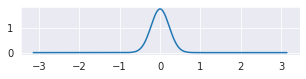

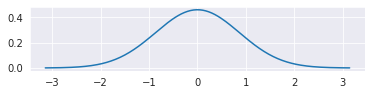

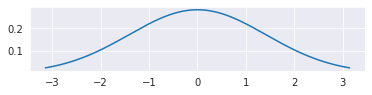

In [87]:
#collapse-show
plt.figure(figsize=(5,3))
for i, var in enumerate(variance):
    plt.subplot(3,1,i+1)  
    plt.plot(x,univariate_normal(x, mean, var))
    plt.show()

# matplot lib animation below here

In [89]:
#collapse-show
x = np.linspace(0.,1.,500) # 500 points evenly spaced ovr [0,1]
mu = np.zeros((500))

In [90]:
#collapse-show
fig,ax = plt.subplots()
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import seaborn as sns

sns.set_style('darkgrid')

var = [0.05, 0.1, 0.25, 0.5, 1., 2., 4.]

x = np.linspace(-2.,2.,500) # 500 points evenly spaced ovr [0,1]
mu = np.zeros((500))

def update(iterations):
    ax.cla()
    k = var[iterations]
    for i in range(20):
        ax.plot(x,univariate_normal(x, mean, k),color='b', alpha=0.2)
        ax.set_title("$Univariate-Normal$\n variance = %s " %var[iterations]);
        ax.set_ylim((0,2))

num_iterations = len(var)
anim = FuncAnimation(fig, update, frames = np.arange(0,num_iterations-1,1), interval = 250)
plt.close()

rc('animation',html='jshtml')
anim